Course Description
  
Time series data is ubiquitous. Whether it be stock market fluctuations, sensor data recording climate change, or activity in the brain, any signal that changes over time can be described as a time series. Machine learning has emerged as a powerful method for leveraging complexity in data in order to generate predictions and insights into the problem one is trying to solve. This course is an intersection between these two worlds of machine learning and time series data, and covers feature engineering, spectograms, and other advanced techniques in order to classify heartbeat sounds and predict stock prices.


# Time Series and Machine Learning Primer
  
This chapter is an introduction to the basics of machine learning, time series data, and the intersection between the two.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Timeseries kinds and applications
  
Welcome to Introduction to Machine Learning for Timeseries Data. This course is focused on the intersection of Machine Learning and Time series data, and hence we expect you have taken introductory courses on Machine learning and time series analysis here on DataCamp.
  
**Time Series**
  
This course focuses on machine learning in the context of timeseries data. Put simply, a timeseries means data that changes over time. This can take many different forms, such as atmospheric CO2 over time, the waveform of my voice as I am speaking, the fluctuation of a stock's value over the year, or demographic information about a city.
  
**What makes a time series?**
  
Timeseries data consists of at least two things: One, an array of numbers that represents the data itself. Two, another array that contains a timestamp for each datapoint. The timestamps can include a wide range of time data, from months of the year to nanoseconds.
  
**Reading in a time series with Pandas**
  
Here we import timeseries data into a pandas DataFrame. Note that each datapoint has a corresponding time point (in this case, a date), though multiple datapoints may have the same time point.
  
**Plotting a pandas timeseries**
  
Here is the code to plot this timeseries data with Matplotlib and Pandas. We first create a figure and axis, then read in the data with Pandas and use the dot-plot method to plot the data on the axis.
  
`import pandas as pd`  
`import matplotlib.pyplot as plt`  
  
`data = pd.read_csv(data.csv)`  
`fig, ax = plt.subplots(figsize=(12, 6))`  
`data.plot('date', 'close', ax=ax)`  
`ax.set(title='AAPL daily closing price')`  
  
**A timeseries plot**
  
The amount of time that passes between timestamps defines the "period" of the timeseries. In this case, it is about one day. This often helps us infer what kind of timeseries we're dealing with.
  
**Why machine learning?**
  
Machine learning has taken the world of data science by storm. In the last few decades, advances in computing power, algorithms, and community practices have made it possible to use computers to ask questions that were never thought possible. Machine learning is about finding patterns in data - often patterns that are not immediately obvious to the human eye. This is often because the data is either too large or too complex to be processed by a human.
  
Another crucial part of machine learning is that we can build a model of the world that formalizes our knowledge of the problem at hand. We can use this model to make predictions. Combined with automation, this can be a critical component of an organization's decision making.
  
**Why combine these two?**
  
Why should we treat timeseries any differently from another data set? Well, machine learning is all about finding patterns in data. Timeseries data always change over time, which turns out to be a useful pattern to utilize. 
  
![Alt text](../_images/ts-someone-speaking.png)  
  
For example, here is a raw waveform of someone speaking, and here is a collection of timeseries features that were extracted from it. As you can see, using timeseries-specific features lets us see a much richer representation of the raw data.
  
**A machine learning pipeline**
  
This course will focus on a simple machine learning pipeline in the context of timeseries data. This boils down to the following main steps. Feature extraction: what kinds of special features leverage a signal that changes over time? Model fitting: what kinds of models are suitable for asking questions with timeseries data? Validation: How can we validate a model that uses timeseries data? What considerations must we make because it changes in time?

### Identifying a time series
  
Which of the following data sets is not considered time series data?
  
Possible Answers
  
- [ ] Test grades for the last fall and spring semesters of high-school students.

- [ ] A student's attendance record each week of the semester.

- [ ] The school's national annual ranking since 2000.

- [x] A list of the average length of each class at the school.
  
Yes! You don't have timestamps for each data point, so it is not a time series.

### Plotting a time series (I)
  
In this exercise, you'll practice plotting the values of two time series without the time component.
  
1. Print the first five rows of data.
  
2. Print the first five rows of data2.
  
3. Plot the values column of both the data sets on top of one another, one per axis object.

In [43]:
# Loading datasets
data = pd.read_csv('../_datasets/data.csv', index_col=0)
data2 = pd.read_csv('../_datasets/data2.csv', index_col=0)

In [44]:
data.head()

,data_values
0,214.009998
1,214.379993
2,210.969995
3,210.580000
4,211.980005


In [45]:
data2.head()

,data_values
0,-0.006928
1,-0.007929
2,-0.008900
3,-0.009815
4,-0.010653


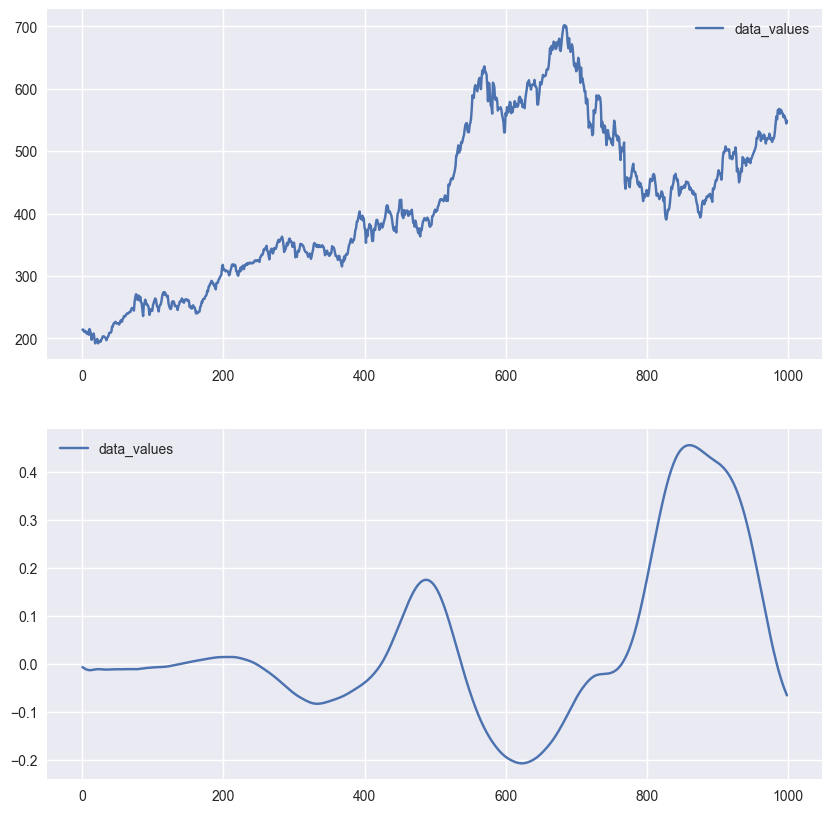

In [46]:
# Changing graph style
plt.style.use('seaborn-v0_8')

# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
data.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show()

### Plotting a time series (II)
  
You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.
  
1. Plot data and data2 on top of one another, one per axis object.
  
2. The x-axis should represent the time stamps and the y-axis should represent the dataset values.

In [47]:
# Loading data required
data = pd.read_csv('../_datasets/data_time.csv', index_col=0)
data2 = pd.read_csv('../_datasets/data_time.csv', index_col=0)

In [48]:
data.head()

,time,data_values
0,2010-01-04,214.009998
1,2010-01-05,214.379993
2,2010-01-06,210.969995
3,2010-01-07,210.580000
4,2010-01-08,211.980005


In [49]:
data2.head()

,time,data_values
0,2010-01-04,214.009998
1,2010-01-05,214.379993
2,2010-01-06,210.969995
3,2010-01-07,210.580000
4,2010-01-08,211.980005


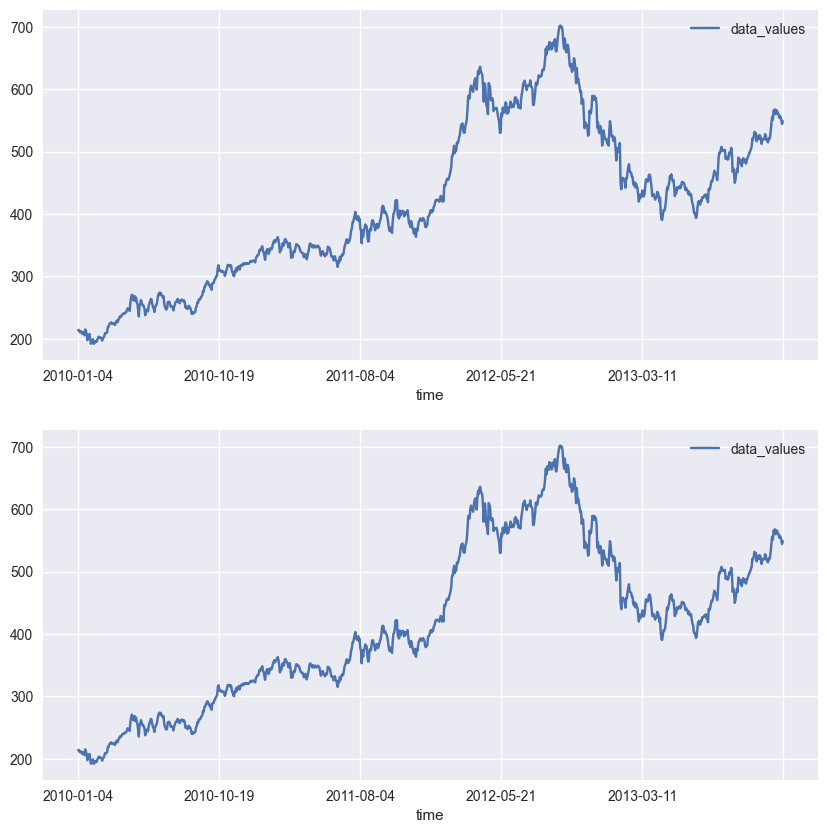

In [50]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(10, 10))
data.iloc[:1000].plot(x='time', y='data_values', ax=axs[0])
data2.iloc[:1000].plot(x='time', y='data_values', ax=axs[1])
plt.show()

As you can now see, each time series has a very different sampling frequency (the amount of time between samples). The first is daily stock market data, and the second is an audio waveform.

## Machine learning basics
  
Now we'll cover the basics of Machine Learning. This should be a recap of material that you've already covered in previous DataCamp courses. We'll start with the basics of how to fit and predict a model using scikit-learn.
  
**Always begin by looking at your data**
  
Before performing any data analysis, you should always take a look at your raw data. This gives you a quick high-level take on the quality/kind of your data. In Numpy, you can do so by printing out the first few rows of the data (via `array.shape` for the shape and `array[:5]` for the head).
  
In Pandas, this can be done by using the `.head()` method, which shows the first five rows and all columns by default.
  
**Always visualize your data**
  
It is also crucial to visualize your data. The proper visualization will depend on the kind of data you've got, though histograms and scatterplots are a good place to start. Look at the distribution of your data. Does it seem reasonable? Are there any outliers? Are you missing data? Each of these questions is important to answer before doing any analysis.
  
**Scikit-learn**
  
Once you've gotten to know your data, it's time to start modeling it. The most popular library for machine learning in Python is called "scikit-learn". It has a standardized API so that you can fit many different models with a similar code structure. Here, we import Support Vector Machine to classify datapoints.
  
`from sklearn.svm import LinearSVC`  
  
**Preparing data for scikit-learn**
  
scikit-learn expects data to have a particular shape. Before using scikit-learn, your data should be two-dimensional. The first axis should correspond to sample number, and the second should correspond to feature number. This pattern is used in almost all scikit-learn functions. If your data is not in this shape, there are a few options for reshaping it so that you can use it with scikit-learn.
  
**If your data is not shaped properly**
  
The most common approach is to "transpose" your data. This will swap the first and last axis. This is most useful when your data is two-dimensional.
  
`array.T.shape`  
  
Another option is to use the `.reshape()` method, which lets you specify the shape you want. If we are missing an axis use `.reshape()`. The below code reshapes (10,) into (10, 1). Using -1 will automatically fill that axis with remaining values.
  
`array.reshape(-1, 1).shape`  
  
**Fitting a model with scikit-learn**
  
Now that your data has the correct shape, it's time to fit a model. First we must create an instance of the model we've imported (in this case, a support-vector classifier). You can call the method `.fit()` on this instance to train the model. Here we show how you can input X (training data) and y (labels for each datapoint) to fit the model.
  
**Investigating the model**
  
It is often useful to investigate what kind of pattern the model has found. Most models will store this information in attributes that are created after calling `.fit()`. Here we show the coefficients the model has given to each feature.
  
`model.coef_`  
  
**Predicting with a fit model**
  
Once your model is fit, you can call the `.predict()` method on the model to determine labels for unseen datapoints.

### Fitting a simple model: classification
  
In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.
  
1. Print the first five rows of data.
  
2. Extract the "petal length (cm)" and "petal width (cm)" columns of data and assign it to X.
  
3. Fit a model on X and y.

In [51]:
# Loading required dataset
data = pd.read_csv('../_datasets/iris_tsa.csv', index_col=0)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

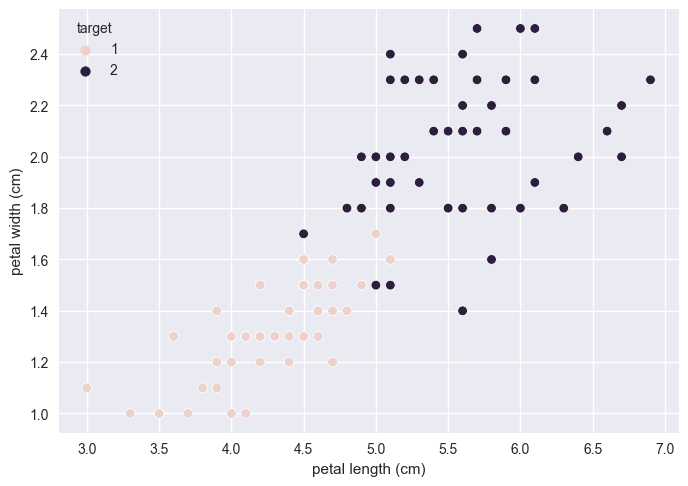

In [52]:
# Exercise has a visual associated with it, this is the correct visual
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=data)

In [53]:
from sklearn.svm import LinearSVC


# X/y split
X = data[['petal length (cm)', 'petal width (cm)']]
y = np.ravel(data[['target']])

# Instanciate the model
model = LinearSVC()

# Fit the model
model.fit(X, y)

LinearSVC()

You've successfully fit a classifier to predict flower type!

### Predicting using a classification model
  
Now that you have fit your classifier, let's use it to predict the type of flower (or class) for some newly-collected flowers.
  
Information about petal width and length for several new flowers is stored in the variable targets. Using the classifier you fit, you'll predict the type of each flower.
  
1. Predict the flower type using the array X_predict.
  
2. Run the given code to visualize the predictions.

In [54]:
targets = pd.read_csv('../_datasets/iris_target.csv', index_col=0)

[2 2 2 1 1 2 2 2 2 1 2 1 1 2 1 1 2 1 2 2]


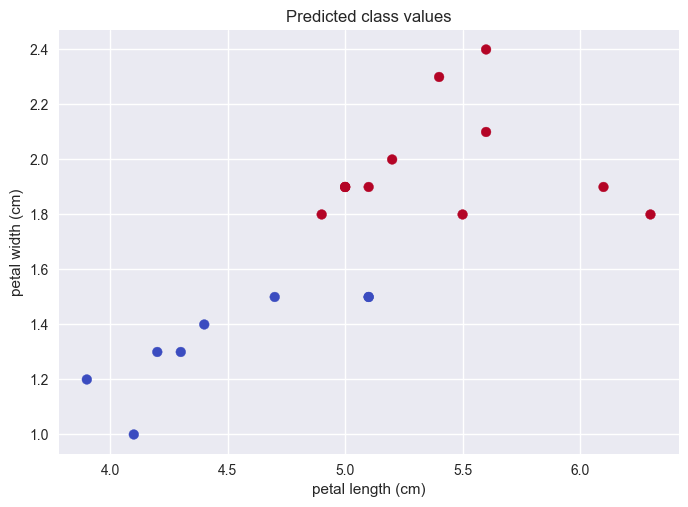

In [55]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

Note that the output of your predictions are all integers, representing that datapoint's predicted class.

### Fitting a simple model: regression
  
In this exercise, you'll practice fitting a regression model using data from the California housing market. A DataFrame called housing is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?
  
- "MedHouseVal": the median house value for California districts (in $100,000s of dollars)
- "AveRooms" : average number of rooms per dwelling
  
1. Prepare X and y DataFrames using the data in housing. X should be the Median House Value, y average number of rooms per dwelling.
  
2. Fit a regression model that uses these variables (remember to shape the variables correctly!).
  
3. Don't forget that each variable must be the correct shape for scikit-learn to use it!

In [56]:
# Loading required data
boston = pd.read_csv('../_datasets/boston.csv', index_col=0)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


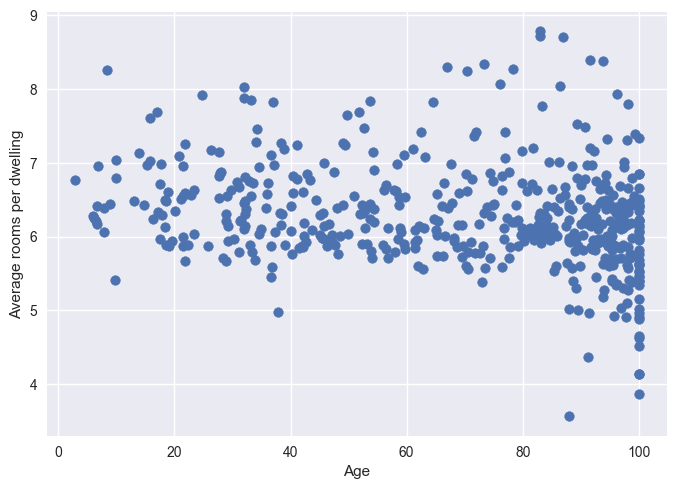

In [57]:
# Visual with exercise that shows age and avg. rooms per dwelling
plt.scatter(boston['AGE'], boston['RM'])
plt.xlabel('Age')
plt.ylabel('Average rooms per dwelling')
plt.show()

In [58]:
from sklearn.linear_model import LinearRegression


# Prepare input and output DataFrame, X/y split
X = boston[['AGE']]
y = boston[['RM']]

# Instanciate model
model = LinearRegression()

# Fit the model
model.fit(X, y)

LinearRegression()

In regression, the output of your model is a continuous array of numbers, not class identity.

### Predicting using a regression model
  
Now that you've fit a model with the California housing data, lets see what predictions it generates on some new data. You can investigate the underlying relationship that the model has found between inputs and outputs by feeding in a range of numbers as inputs and seeing what the model predicts for each input.
  
A 1-D array new_inputs consisting of 100 "new" values exist in the workspace (I have to load it).
  
1. Review new_inputs in the shell.
  
2. Reshape new_inputs appropriately to generate predictions.
  
3. Run the given code to visualize the predictions.

In [59]:
# Getting the 'new_inputs' array
new_inputs = np.array(pd.read_csv('../_datasets/boston_newinputs.csv', index_col=0, header=None).values)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


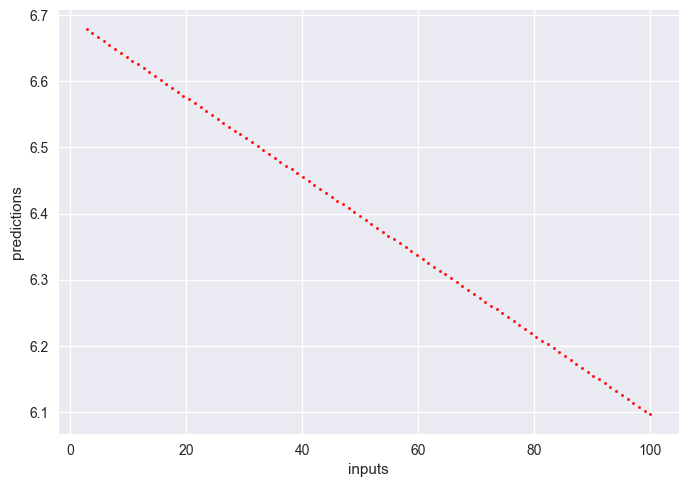

In [60]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs)

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

Here the red line shows the relationship that your model found. As the age grows, the average rooms per dwelling declines linearly.

## Combining timeseries data with machine learning
  
In the final lesson of this chapter, we'll discuss the interaction between machine learning and timeseries data, and introduce why they're worth thinking about in tandem.
  
**Getting to know our data**
  
First, let's give a quick overview of the data we'll be using. They're both freely available online, and come from the excellent website Kaggle-dot-com.
  
**The Heartbeat Acoustic Data**
  
Audio is a very common kind of timeseries data. Audio tends to have a very high sampling frequency (often above 20,000 samples per second!). Our first dataset is audio data recorded from the hearts of medical patients. A subset of these patients have heart abnormalities. Can we use only this heartbeat data to detect which subjects have abnormalities?
  
**Loading auditory data**
  
`from glob import glob`  

Audio data is often stored in "wav" files. We can list all of these files using the `glob()` function. It lists files that match a given pattern. Each of these files contains the auditory data for one heartbeat session, as well as the sampling rate for that data.
  
**Reading in auditory data**
  
pip3 install librosa  
`import librosa as lr`  
  
`audio, sfreq = lr.load(data.wav)`  
  
We'll use a library called "librosa" to read in the audio dataset. Librosa has functions for extracting features, visualizations, and analysis for auditory data. We can import the data using the `lr.load()` function, just as you would use `pd.read_csv()` for example. The data is stored in audio and the sampling frequency is stored in sfreq. Note that the sampling frequency here is 2205, which means 2205 samples are recorded per second.
  
**Inferring time from samples**
  
Using only the sampling frequency, we can infer the timepoint of each datapoint in our audio file, relative to the start of the file.
  
**Creating a time array (I)**
  
Now we'll create an array of timestamps for our data. To do so, you have two options. The first is to generate a range of indices from zero to the number of datapoints in your audio file, divide each index by the sampling frequency, and you have a timepoint for each data point.
  
`indices = np.arange(0, len(audio))`
`time = indices / sfreq`  
  
**Creating a time array (II)**
  
The second option is to calculate the final timepoint of your audio data using a similar method. Then, use the `linspace()` function to generate evenly-spaced numbers between 0 and the final timepoint. In either case, you should have an array of numbers of the same length as your audio data.
  
`final_time = (len(audio)-1)/sfreq`  
`time = np.linspace(0, final_time, sfreq)`  
  
**The New York Stock Exchange dataset**
  
Next, we'll explore data from the New York Stock Exchange. It runs over a much longer timespan than our audio data, and has a sampling frequency on the order of one sample per day (compared with 2,205 samples per second with the audio data). Our goal is to predict the stock value of a company using historical data from the market. As we are predicting a continuous output value, this is a regression problem.
  
**Looking at the data**
  
Let's take a look at the raw data. Each row is a sample for a given day and company. It seems that the dates go back all the way to 2010.
  
**Timeseries with Pandas DataFrames**
  
It is useful to investigate the "type" of data in each column. Numpy or Pandas may treat an array of data in special ways depending on its type. We can print the type of each column by looking at the `.dtypes` attribute. Here we see that the type of each column is "object", which is a generic data type.
  
**Converting a column to a time series**
  
Since we know one column is actually a list of dates, let's change the column type to "datetime" using the `pd.to_datetime()` function. This will help us perform visualization and analysis later on.

### Inspecting the classification data
  
In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.
  
The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.
  
As you have labeled data, this dataset is ideal for classification. In fact, it was originally offered as a part of a public Kaggle competition.
  
1. Use glob to return a list of the .wav files in data_dir directory.
  
2. Import the first audio file in the list using librosa.
  
3. Generate a time array for the data.
  
4. Plot the waveform for this file, along with the time array.

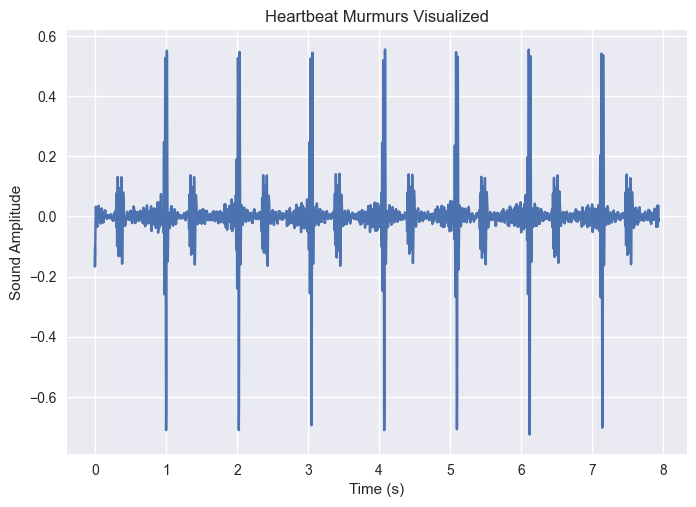

In [61]:
import librosa as lr
from glob import glob

# List all the wav files in the folder
audio_files = glob('../_datasets/heartbeat-audio-files/*.wav')

# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.title('Heartbeat Murmurs Visualized')
plt.savefig('../_images/murmur_sound.png')  # Saves visualization
plt.show()

There are several seconds of heartbeat sounds in here, though note that most of this time is silence. A common procedure in machine learning is to separate the datapoints with lots of stuff happening from the ones that don't.

### Inspecting the regression data
  
The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. This dataset was also originally provided as part of a public Kaggle competition.
  
In this exercise, you'll plot the time series for a number of companies to get an understanding of how they are (or aren't) related to one another.
  
1. Import the data with Pandas (stored in the file 'prices.csv').
  
2. Convert the index of data to datetime.
  
3. Loop through each column of data and plot the the column's values over time.

                  AAPL  FB       NFLX          V        XOM
time                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07  210.580000 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


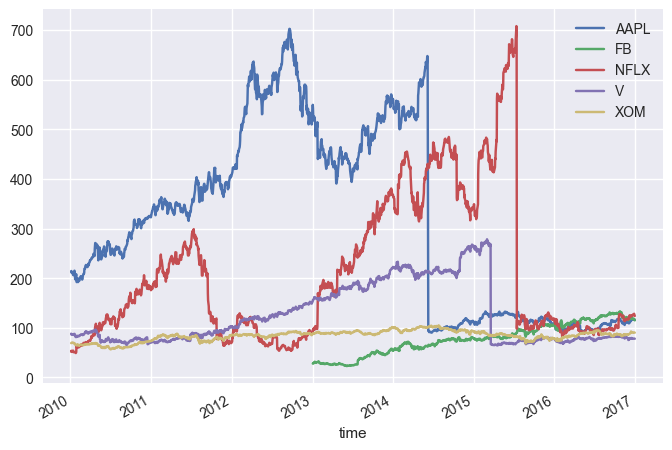

In [62]:
# Read in the data
data = pd.read_csv('../_datasets/prices_nyse.csv', index_col=0)

# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

Note that each company's value is sometimes correlated with others, and sometimes not. Also note there are a lot of 'jumps' in there - what effect do you think these jumps would have on a predictive model?

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1762 entries, 2010-01-04 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1762 non-null   float64
 1   FB      1008 non-null   float64
 2   NFLX    1762 non-null   float64
 3   V       1762 non-null   float64
 4   XOM     1762 non-null   float64
dtypes: float64(5)
memory usage: 82.6 KB


In [68]:
data.FB.isna().sum()  # Count of NaN values in Facebook stock

754

In [70]:
data.isna().mean().multiply(100)  # Percent of NaN values in each column

AAPL     0.000000
FB      42.792281
NFLX     0.000000
V        0.000000
XOM      0.000000
dtype: float64